# 8.4 Распознавание цифр (MNIST)

In [12]:
import torch

In [13]:
from setup_libs import *

import torchvision

from torch import nn, optim

from torch.nn import Sequential, Linear, LogSoftmax, Sigmoid, Flatten, Softmax, ReLU

from torchvision import datasets, transforms

from torch.utils.data import random_split, DataLoader

## Картинки!

In [21]:
iter(train_loader).next()

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [15]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

train, val = random_split(train_data, [55000, 5000])
train_loader = DataLoader(train, batch_size=32)
val_loader = DataLoader(val, batch_size=32)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [16]:
val[4][0].size()

torch.Size([1, 28, 28])

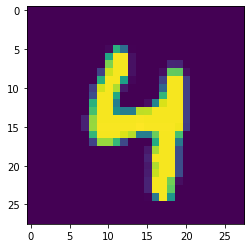

In [17]:
plt.imshow(val[4][0].reshape(28,28).numpy())
plt.show()

In [22]:
model = Sequential(
    Linear(28 * 28, 64), # на входе - размеры картинки
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 10) # 10 классов
)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for epoch in range(4):
    
    # training part
    train_losses = list()
    train_count_correct = 0 
    for batch in train_loader: # 55000 / 32 раз
        x, y = batch
        # x: batch_size x 1 x 28 x 28
        # y: batch_size x 1
        
        x = x.view(x.size(0), -1) # matrix of vectors batch_size x (28 * 28)
        
        y_pred = model(x)
        
        batch_loss = criterion(y_pred, y)
        
        train_losses.append(batch_loss.item())
        train_count_correct += (y_pred.argmax(-1) == y).sum().item()
        
        
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch + 1}, Train Loss: {torch.tensor(train_losses).mean()}, Accuracy: {train_count_correct / len(train)}')


Epoch: 1, Train Loss: 1.269879937171936, Accuracy: 0.6802363636363636
Epoch: 2, Train Loss: 0.3911306858062744, Accuracy: 0.8904727272727273
Epoch: 3, Train Loss: 0.31996259093284607, Accuracy: 0.9075636363636364
Epoch: 4, Train Loss: 0.28463730216026306, Accuracy: 0.9178181818181819


## Check model

In [24]:
val_losses = list()
val_count_correct = 0
for batch in val_loader:
    x, y = batch
    x = x.view(x.size(0), -1)

    with torch.no_grad():
        y_pred = model(x) 

    batch_loss = criterion(y_pred, y)
    val_losses.append(batch_loss.item())
    val_count_correct += (y_pred.argmax(-1) == y).sum().item()

print(f'Test Loss: {torch.tensor(val_losses).mean()}, Test Accuracy: {val_count_correct / len(val)}')

Test Loss: 0.28182294964790344, Test Accuracy: 0.9194


## Обычно делают одновременно

In [9]:
model = Sequential(
    Linear(28 * 28, 64), # на входе - размеры картинки
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 10) # 10 классов
)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for epoch in range(4):
    
    # training part
    train_losses = list()
    train_count_correct = 0 
    for batch in train_loader:
        x, y = batch
        # x: batch_size x 1 x 28 x 28
        # y: batch_size x 1
        
        x = x.view(x.size(0), -1)
        
        y_pred = model(x) 
        
        batch_loss = criterion(y_pred, y)
        train_losses.append(batch_loss.item())
        train_count_correct += (y_pred.argmax(-1) == y).sum().item()
        
        
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch + 1}, Train Loss: {torch.tensor(train_losses).mean()}, Accuracy: {train_count_correct / len(train)}')
    
    # validation part
    val_losses = list()
    val_count_correct = 0
    for batch in val_loader:
        x, y = batch
        x = x.view(x.size(0), -1)
        
        with torch.no_grad():
            y_pred = model(x) 
        
        batch_loss = criterion(y_pred, y)
        val_losses.append(batch_loss.item())
        val_count_correct += (y_pred.argmax(-1) == y).sum().item()

    
    print(f'Epoch: {epoch + 1}, Test Loss: {torch.tensor(val_losses).mean()}, Accuracy: {val_count_correct / len(val)}')
    print('------------------------------------')


Epoch: 1, Train Loss: 1.212336540222168, Accuracy: 0.6834727272727272
Epoch: 1, Test Loss: 0.5203611254692078, Accuracy: 0.8592
------------------------------------
Epoch: 2, Train Loss: 0.4020938575267792, Accuracy: 0.8878
Epoch: 2, Test Loss: 0.3696366250514984, Accuracy: 0.8992
------------------------------------
Epoch: 3, Train Loss: 0.32035088539123535, Accuracy: 0.9084363636363636
Epoch: 3, Test Loss: 0.31972256302833557, Accuracy: 0.9096
------------------------------------
Epoch: 4, Train Loss: 0.2810913324356079, Accuracy: 0.9192545454545454
Epoch: 4, Test Loss: 0.2877568304538727, Accuracy: 0.9184
------------------------------------


# Ссылки интересные
* [MNIST solution](https://www.youtube.com/watch?v=OMDn66kM9Qc)